**SOFT DEADLINE:** `20.03.2022 23:59 msk` 

# [5 points] Part 1. Data cleaning

The task is to clear the text data of the crawled web-pages from different sites. 

It is necessary to ensure that the distribution of the 100 most frequent words includes only meaningful words in english language (not particles, conjunctions, prepositions, numbers, tags, symbols).

Determine the order of operations below and carry out the appropriate cleaning.

1. Remove non-english words
1. Remove html-tags (try to do it with regular expression, or play with beautifulsoap library)
1. Apply lemmatization / stemming
1. Remove stop-words
1. Additional processing - At your own initiative, if this helps to obtain a better distribution

#### Hints

1. To do text processing you may use nltk and re libraries
1. and / or any other libraries on your choise

#### Data reading

The dataset for this part can be downloaded here: `https://drive.google.com/file/d/1wLwo83J-ikCCZY2RAoYx8NghaSaQ-lBA/view?usp=sharing`


In [19]:
#Libs initialization
import re
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import wordnet 
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vando\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vando\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vando\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\vando\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vando\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\vando\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [41]:
DATASET_LEN = 3000

#Importing dataframe

df = pd.read_csv('web_sites_data.csv').fillna("").iloc[:DATASET_LEN,:]
df.head(10)

,text
0,"<html>\n<head profile=""http://www.w3.org/2005/..."
1,"<html>\n<head profile=""http://www.w3.org/2005/..."
2,"<html>\n<head profile=""http://www.w3.org/2005/..."
3,"<html>\n<head profile=""http://www.w3.org/2005/..."
4,"<html>\n<head profile=""http://www.w3.org/2005/..."
5,"<html>\n<head profile=""http://www.w3.org/2005/..."
6,"<html>\n<head profile=""http://www.w3.org/2005/..."
7,"<html>\n<head profile=""http://www.w3.org/2005/..."
8,"<html>\n<head profile=""http://www.w3.org/2005/..."
9,"<html>\n<head profile=""http://www.w3.org/2005/..."


#### Data processing

In [42]:

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
# The above func was borrowed here: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python

def preprocess_text(input_text):
    
    #Remove HTML stuff
    soup = BeautifulSoup(input_text)
    base_text = soup.get_text()

    # Move to lower case
    new_text = base_text.lower()

    # Remove contractions
    new_text = decontracted(new_text)

    # Remove bad symbols
    new_text = re.sub(r"[^\w\s]", "", new_text) # This call saves _
    new_text = re.sub("_", " ", new_text)

    # Split to tokens
    text_tokens = new_text.split()
    # tokens = TreebankWordTokenizer().tokenize(text) 

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    sw_tokens = [token for token in text_tokens if not token in stop_words]

    #Lemmatization
    lemmatizer = WordNetLemmatizer()
    # Lemmatize nouns
    lemm_tokens = [lemmatizer.lemmatize(token) for token in sw_tokens]
    # Lemmatize verbs
    lemm_tokens = [lemmatizer.lemmatize(token, "v") for token in lemm_tokens]

    # Save only existing english words
    en_words = set(nltk.corpus.words.words())
    fin_text = [token for token in lemm_tokens if token.lower() in en_words]
    fin_text = " ".join(fin_text) # Collect text from tokens

    return fin_text

In [43]:
df_text_list = []
for i in tqdm(range(DATASET_LEN)):     #range(df.shape[0]) takes too long (80000 takes about 3 hours), so just 1000 rows for now
    df_text_list.append(preprocess_text(df['text'][i]))


100%|██████████| 3000/3000 [05:21<00:00,  9.33it/s]


#### Vizualization

As a visualisation, it is necessary to construct a frequency distribution of words (the 100 most common words), sorted by frequency. 

For visualization purposes we advice you to use plotly, but you are free to choose other libraries

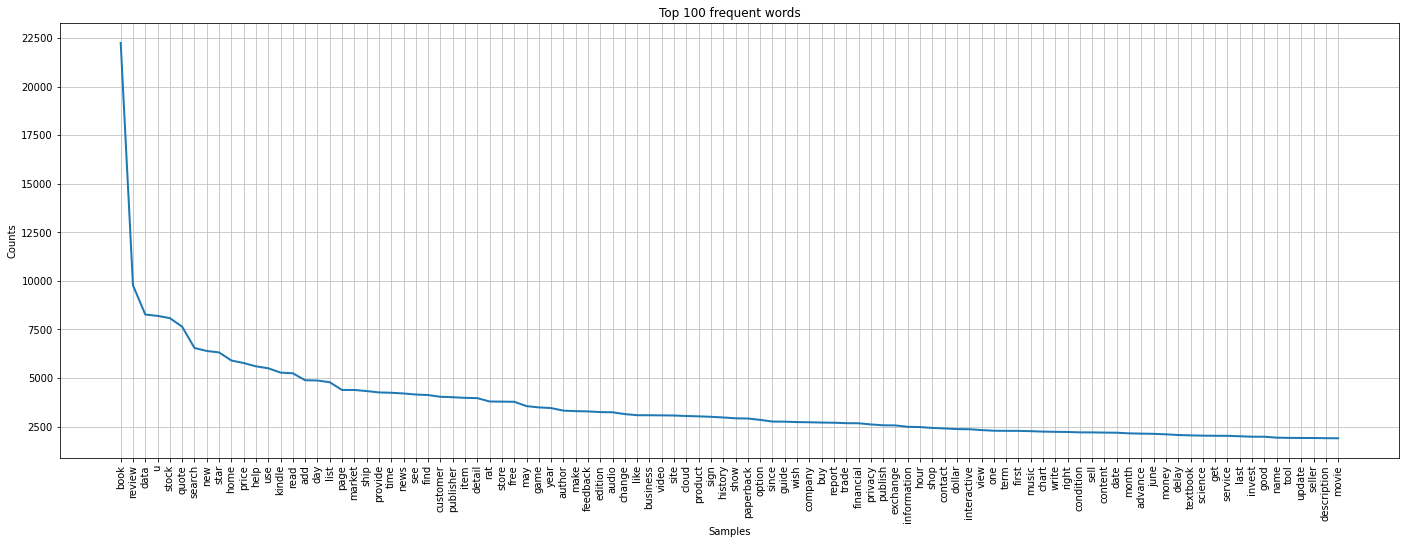

<AxesSubplot:title={'center':'Top 100 frequent words'}, xlabel='Samples', ylabel='Counts'>

In [44]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

full_text = " ".join(df_text_list)

plt.figure(figsize=(24,8))
fdist = FreqDist(full_text.split())
fdist.plot(100, title="Top 100 frequent words")

#### Provide examples of processed text (some parts)

Is everything all right with the result of cleaning these examples? What kind of information was lost?

In [45]:
print(df_text_list[0][:1000])
print("-" * 100)
print(df_text_list[10][:1000])
print("-" * 100)
print(df_text_list[100][:1000])


eric love war eric love war author eric title love war copy copy available suggest short walk shore last grain low gear recommend box recommendation topic memoir war publish bind audio page date publisher audio weight pound size x x inch edition abridge price previous giver oh previous moocher ca description book description make peace summer ally pow eric among walk away prison camp occupy german camp behind line go mountain help local evade retreat enemy peasant shelter three month classic memoir recall selfless people unchanging funny bizarre dangerous incident hope local girl later become wife excite story superbly tell punch relate interest hood passage freedom available bot add save later web site relate edition recommend
----------------------------------------------------------------------------------------------------
grind zero grind zero author title grind zero copy copy available suggest whirlwind recommend ultimate weight solution food j grind c c relationship separate sca

We have lost numbers and punctuation. Forms of nouns and verbs

# [10 points] Part 2. Duplicates detection. LSH

#### Libraries you can use

1. LSH - https://github.com/ekzhu/datasketch
1. LSH - https://github.com/mattilyra/LSH
1. Any other library on your choise

1. Detect duplicated text (duplicates do not imply a complete word-to-word match, but texts that may contain a paraphrase, rearrangement of words, sentences)
1. Make a plot dependency of duplicates on shingle size (with fixed minhash length) 
1. Make a plot dependency of duplicates on minhash length (with fixed shingle size)

In [51]:
from datasketch import MinHash, MinHashLSH

# Make shingles of k words
def ngrams(text, ksize):
    tokens = text.split()
    return [' '.join(tokens[i:i+ksize])
                     for i in range(len(tokens) - ksize + 1)]

def find_duplicates(shin_size = 5, mhash_len = 50, verbose = True):
    min_hash_list = []
    duplicates_num = 0
    # Train
    lsh = MinHashLSH(threshold=0.5, num_perm=mhash_len)
    
    for text_num in range(len(df_text_list)):
        if not df_text_list[text_num] == "":
            shingles = ngrams(df_text_list[text_num], shin_size)

            m = MinHash(num_perm=mhash_len)

            for ngram in shingles:
                m.update(ngram.encode('utf8'))
            
            lsh.insert(str(text_num), m)
            min_hash_list.append(m)
    # Check
    for m_num in range(len(min_hash_list)):
        lst = lsh.query(min_hash_list[m_num])
        lst.remove(str(m_num)) # Remove
        if verbose:
            print("Approximate neighbours for " + str(m_num) + ':', lst)
        # Count all the duplicates over the corpus
        duplicates_num += len(lst)

    return duplicates_num


In [52]:
# Let's check our corpus for duplicates
find_duplicates()

Approximate neighbours for 0: ['469']
Approximate neighbours for 1: ['1504', '470']
Approximate neighbours for 2: ['471']
Approximate neighbours for 3: ['472']
Approximate neighbours for 4: ['473']
Approximate neighbours for 5: ['474']
Approximate neighbours for 6: ['475']
Approximate neighbours for 7: ['476']
Approximate neighbours for 8: ['477']
Approximate neighbours for 9: ['478']
Approximate neighbours for 10: ['479']
Approximate neighbours for 11: ['480']
Approximate neighbours for 12: ['481']
Approximate neighbours for 13: ['482', '19', '488']
Approximate neighbours for 14: ['483']
Approximate neighbours for 15: ['484']
Approximate neighbours for 16: ['485']
Approximate neighbours for 17: ['486']
Approximate neighbours for 18: ['487']
Approximate neighbours for 19: ['482', '20', '13', '21', '490', '489', '488']
Approximate neighbours for 20: ['21', '490', '33', '489', '502', '19', '488']
Approximate neighbours for 21: ['20', '490', '489', '19', '488']
Approximate neighbours for 

352154

In [55]:
print(df_text_list[2999][:1000])
print("-" * 100)
print(df_text_list[2676][:1000])
print("-" * 100)
print(df_text_list[2830][:1000])

# As one can see these texts are quite similar

quote pinnacle west cap symbol market future fund signal sector quote education member subscriber login member benefit technical chart quote technical sector opinion snapshot advance performance projection fundamental news profile report history detail report sponsor pinnacle west cap daily quote weekly quote monthly quote change earn price earn ratio period high low percent change since since since since since year date since last make new high percent make new low percent back top copyright user agreement apply data provide subject term use privacy policy tool advertise suggestion box support press print page data information provide informational purpose intend trade purpose neither data provider shall liable error delay content action take reliance thereon access web site user agree redistribute information find therein press bookmark page set home page equity future data delay accord exchange minute future exchange minute
-----------------------------------------------------------

In [64]:
# Iterate over shingle size

shingle_sizes = [2, 3, 5, 8, 13, 21, 34]
dupl_numbers = []

for ksize in shingle_sizes:
    dupl_numbers.append(find_duplicates(shin_size = ksize, mhash_len = 50, verbose = False))

print(dupl_numbers)

[425624, 508184, 352154, 235796, 197386, 139404, 68506]


Text(0.5, 1.0, 'Shingle size dependency')

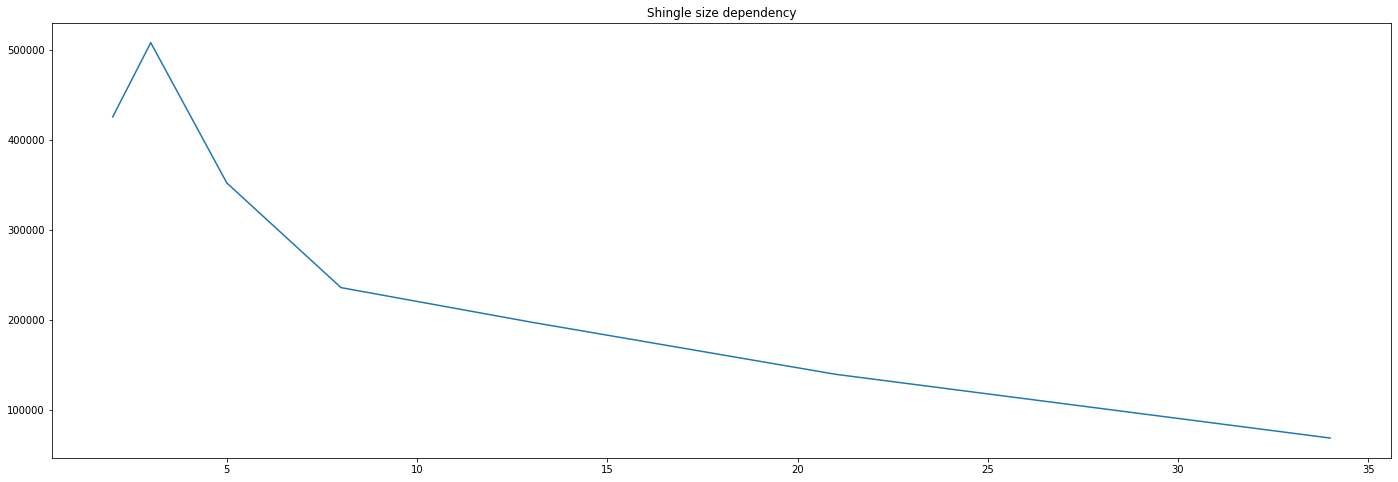

In [65]:
# Print results

plt.figure(figsize=(24,8))
plt.plot(shingle_sizes, dupl_numbers)
plt.title("Shingle size dependency")

In [66]:
# Iterate over minhash length

mhash_lens = [5, 35, 70, 100, 150, 200, 250]
dupl_numbers = []

for mlen in mhash_lens:
    dupl_numbers.append(find_duplicates( mhash_len = mlen, verbose = False))

print(dupl_numbers)

[507152, 319100, 306372, 331312, 372676, 302280, 311154]


Text(0.5, 1.0, 'Minhash length dependency')

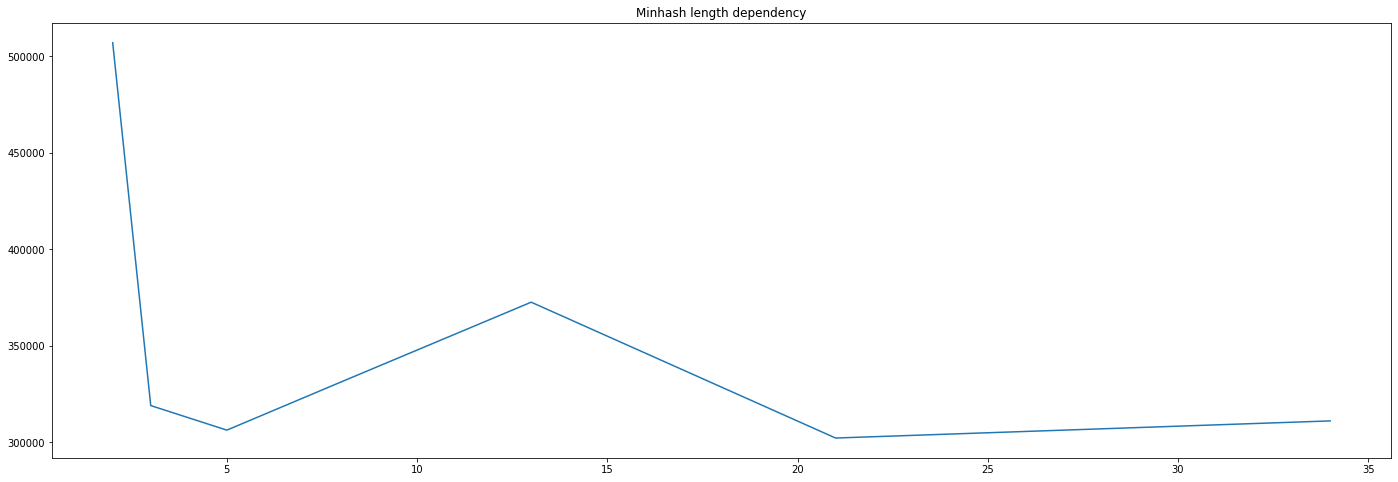

In [68]:
# Print results

plt.figure(figsize=(24,8))
plt.plot(shingle_sizes, dupl_numbers)
plt.title("Minhash length dependency")

# [Optional 10 points] Part 3. Topic model

In this part you will learn how to do topic modeling with common tools and assess the resulting quality of the models. 

The provided data contain chunked stories by Edgar Allan Poe (EAP), Mary Shelley (MWS), and HP Lovecraft (HPL).

The dataset can be downloaded here: `https://drive.google.com/file/d/14tAjAzHr6UmFVFV7ABTyNHBh-dWHAaLH/view?usp=sharing`

#### Preprocess dataset with the functions from the Part 1

#### Quality estimation

Implement the following three quality fuctions: `coherence` (or `tf-idf coherence`), `normalized PMI`, `based on the distributed word representation`(you can use pretrained w2v vectors or some other model). You are free to use any libraries (for instance gensim) and components.

### Topic modeling

Read and preprocess the dataset, divide it into train and test parts `sklearn.model_selection.train_test_split`. Test part will be used in classification part. For simplicity we do not perform cross-validation here, but you should remember about it.

Plot the histogram of resulting tokens counts in the processed datasets.

Plot the histogram of resulting tokens counts in the processed datasets.

#### NMF

Implement topic modeling with NMF (you can use `sklearn.decomposition.NMF`) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

#### LDA

Implement topic modeling with LDA (you can use gensim implementation) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

### Additive regularization of topic models 

Implement topic modeling with ARTM. You may use bigartm library (simple installation for linux: pip install bigartm) or TopicNet framework (`https://github.com/machine-intelligence-laboratory/TopicNet`)

Create artm topic model fit it to the data. Try to change hyperparameters (number of specific and background topics) to better fit the dataset. Play with smoothing and sparsing coefficients (use grid), try to add decorrelator. Print out resulting topics.

Write a function to convert new documents to topics probabilities vectors.

Calculate the quality scores for each model. Make a barplot to compare the quality.